# 21 BDA10 - Aishwarya C S

# ML-1 LAB FINAL PROJECT ON BITCOIN PRICE FORECASTING

# EXPOLRATORY DATA ANALYSIS ON BITCOIN DATASET (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
bitcoin = pd.read_csv("BTC-USD.csv")

In [3]:
bitcoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-14,2360.590088,2363.250000,2183.219971,2233.340088,2233.340088,882502976
1,2017-07-15,2230.120117,2231.139893,1990.410034,1998.859985,1998.859985,993608000
2,2017-07-16,1991.979980,2058.770020,1843.030029,1929.819946,1929.819946,1182870016
3,2017-07-17,1932.619995,2230.489990,1932.619995,2228.409912,2228.409912,1201760000
4,2017-07-18,2233.520020,2387.610107,2164.770020,2318.879883,2318.879883,1512450048
...,...,...,...,...,...,...,...
1822,2022-07-10,21591.080078,21591.080078,20727.123047,20860.449219,20860.449219,28688807249
1823,2022-07-11,20856.353516,20856.353516,19924.539063,19970.556641,19970.556641,24150249025
1824,2022-07-12,19970.474609,20043.445313,19308.531250,19323.914063,19323.914063,25810220018
1825,2022-07-13,19325.972656,20223.052734,18999.953125,20212.074219,20212.074219,33042430345


# 1. DATASET EXPLORATION

In [4]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


In [5]:
bitcoin.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1822,False,False,False,False,False,False,False
1823,False,False,False,False,False,False,False
1824,False,False,False,False,False,False,False
1825,False,False,False,False,False,False,False


In [6]:
bitcoin.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### There are no missing values in Bitcoin Dataset

### Calculating Return Data

In [7]:
bit = pd.read_csv("BTC-USD.csv", parse_dates = True , index_col = 'Date')

In [8]:
bit['Return'] = (bit['Adj Close'] - bit['Open']) / bit['Open']

In [9]:
bit

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-07-14,2360.590088,2363.250000,2183.219971,2233.340088,2233.340088,882502976,-0.053906
2017-07-15,2230.120117,2231.139893,1990.410034,1998.859985,1998.859985,993608000,-0.103699
2017-07-16,1991.979980,2058.770020,1843.030029,1929.819946,1929.819946,1182870016,-0.031205
2017-07-17,1932.619995,2230.489990,1932.619995,2228.409912,2228.409912,1201760000,0.153051
2017-07-18,2233.520020,2387.610107,2164.770020,2318.879883,2318.879883,1512450048,0.038218
...,...,...,...,...,...,...,...
2022-07-10,21591.080078,21591.080078,20727.123047,20860.449219,20860.449219,28688807249,-0.033839
2022-07-11,20856.353516,20856.353516,19924.539063,19970.556641,19970.556641,24150249025,-0.042471
2022-07-12,19970.474609,20043.445313,19308.531250,19323.914063,19323.914063,25810220018,-0.032376


In [10]:
df = pd.read_csv("BTC-USD.csv", parse_dates = True , index_col = 'Date')

In [11]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-14,2360.590088,2363.250000,2183.219971,2233.340088,2233.340088,882502976
2017-07-15,2230.120117,2231.139893,1990.410034,1998.859985,1998.859985,993608000
2017-07-16,1991.979980,2058.770020,1843.030029,1929.819946,1929.819946,1182870016
2017-07-17,1932.619995,2230.489990,1932.619995,2228.409912,2228.409912,1201760000
2017-07-18,2233.520020,2387.610107,2164.770020,2318.879883,2318.879883,1512450048
...,...,...,...,...,...,...
2022-07-10,21591.080078,21591.080078,20727.123047,20860.449219,20860.449219,28688807249
2022-07-11,20856.353516,20856.353516,19924.539063,19970.556641,19970.556641,24150249025
2022-07-12,19970.474609,20043.445313,19308.531250,19323.914063,19323.914063,25810220018


# 2. SUMMARY  STATISTICS

In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,19132.063241,19630.198348,18569.799264,19139.332609,19139.332609,2.410347e+10
std,17484.220431,17933.144862,16958.038595,17475.206056,17475.206056,2.032960e+10
min,1932.619995,2058.770020,1843.030029,1929.819946,1929.819946,7.059430e+08
25%,6864.989014,7106.165039,6709.494873,6873.925293,6873.925293,6.898070e+09
50%,9726.002930,9937.404297,9531.799805,9729.801758,9729.801758,2.113222e+10
75%,33767.375000,34778.076172,32265.797851,33734.515625,33734.515625,3.426749e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [13]:
df['Close'].describe()

count     1827.000000
mean     19139.332609
std      17475.206056
min       1929.819946
25%       6873.925293
50%       9729.801758
75%      33734.515625
max      67566.828125
Name: Close, dtype: float64

### The Average closing price for last five years is 19139.33
### In last five years, the minimum bitcoin price is 1929.82 and the maximum bitcoin price is  67566.82

#  3. PLOTS

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

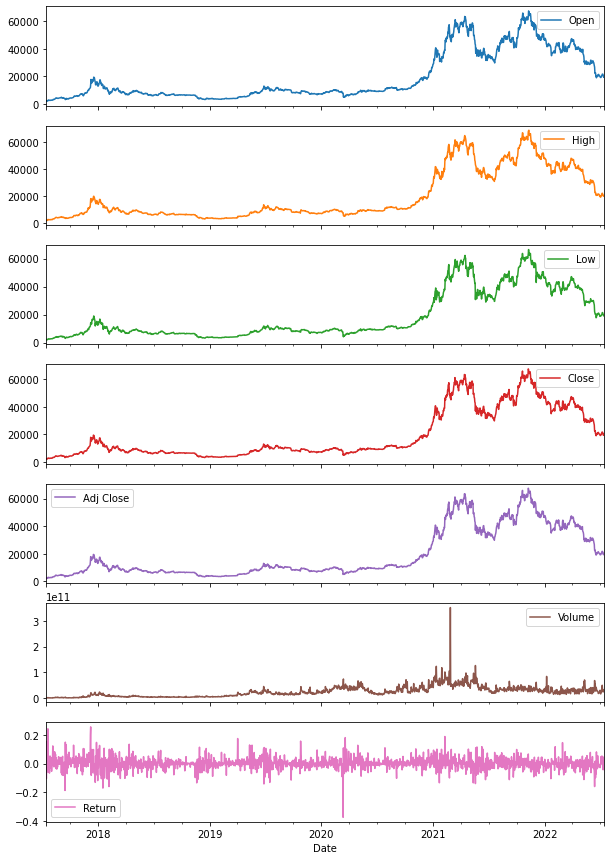

In [14]:
bit.plot(subplots = True, figsize = (10, 15))

In [15]:
plt.rcParams['figure.figsize'] = (16, 8)

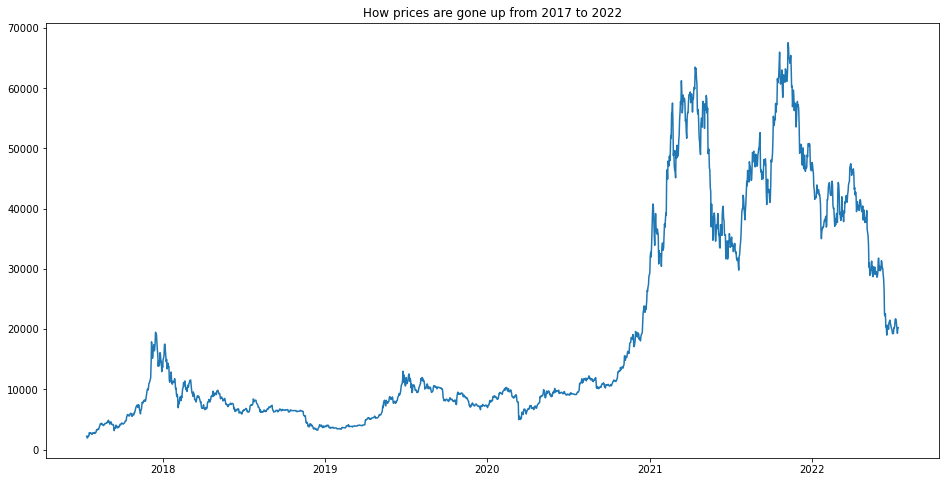

In [16]:
plt.plot(df.index, df['Adj Close'])
plt.title("How prices are gone up from 2017 to 2022")

plt.show()

### From the above graph we can see how the bitcoin price has varied from last five years. We can  see there is rise from 2017 to 2018 but there is a dip from middle of 2018 middle of 2019. From 2021 there is a sudden rise of bitcoin price . 

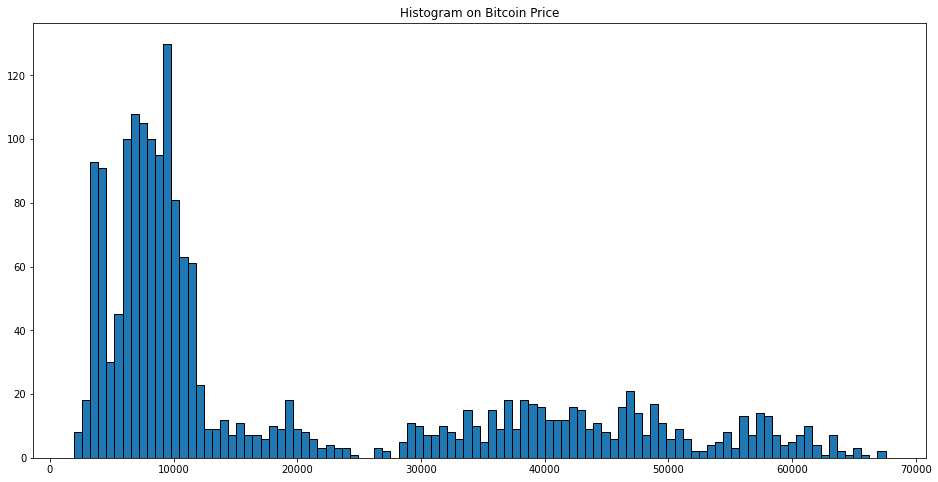

In [17]:
plt.hist(df['Adj Close'], bins = 100 , edgecolor = 'black')
plt.title("Histogram on Bitcoin Price")
plt.show()

### Most of the Bitcoin Closing Price for last five years lies between 0 to 10000.

In [18]:
plt.rcParams['figure.figsize'] = (7, 4)

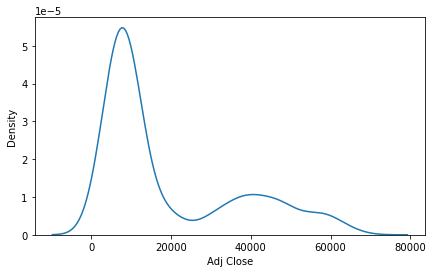

In [19]:
# KERNEL DENSITY

sns.kdeplot(data = df , x = 'Adj Close')
plt.show()

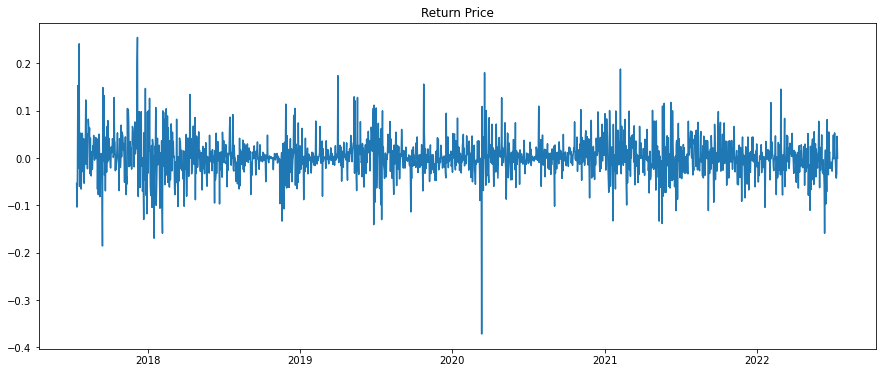

In [20]:
plt.figure(figsize=(15,6))
plt.plot(df.index, bit['Return'])
plt.title("Return Price")
plt.show()

### From 2017 to 2019 we can see a balenced way increasing  and decreasing return prices. But at a particular point in 2020 we can see a huge drop.

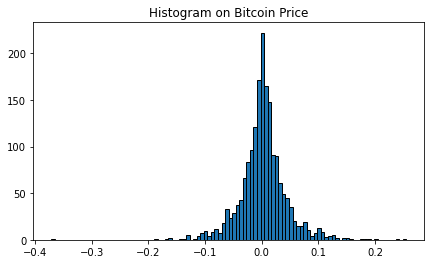

In [21]:
plt.hist(bit['Return'], bins = 100 , edgecolor = 'black')
plt.title("Histogram on Bitcoin Price")
plt.show()

### The Return data ia normally distributed.

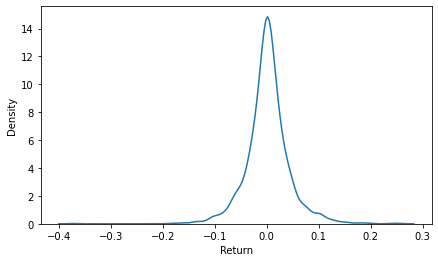

In [22]:
# KERNEL DENSITY

sns.kdeplot(data = bit , x = 'Return')
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

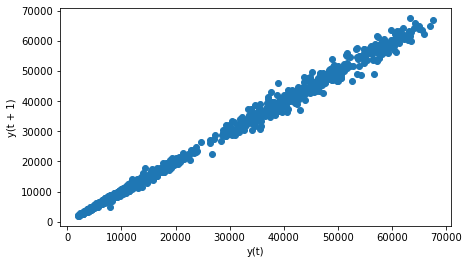

In [23]:
# Lag Plot

from pandas.plotting import lag_plot
lag_plot(df['Adj Close'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

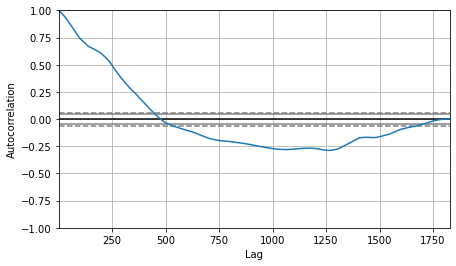

In [24]:
#AUTOCORRELATION PLOT

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Adj Close'])

### From the above two graphs we can see that autocorrelation of lag 1 is very strong and our dataset has the autocorrelation of lag 1

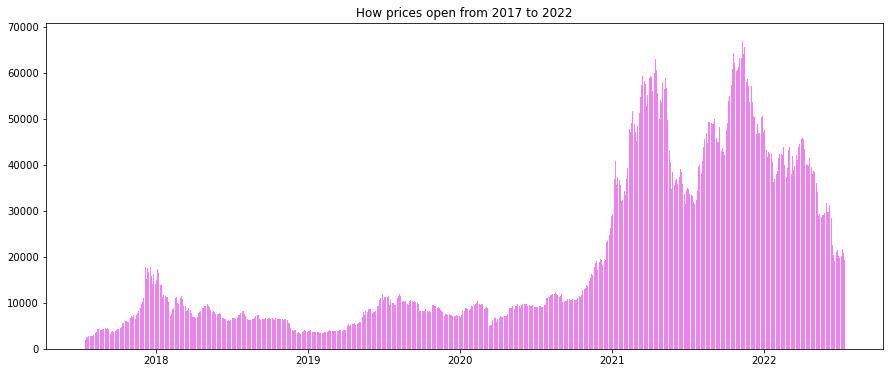

In [25]:
plt.figure(figsize=(15,6))
plt.bar(df.index, df['Open'], color = 'violet')
plt.title("How prices open from 2017 to 2022")

plt.show()


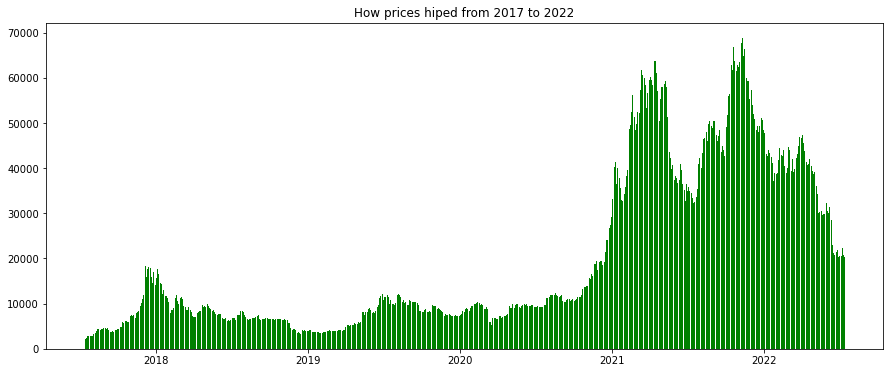

In [26]:
plt.figure(figsize=(15,6))
plt.bar(df.index, df['High'], color = 'green')
plt.title("How prices hiped from 2017 to 2022")

plt.show()


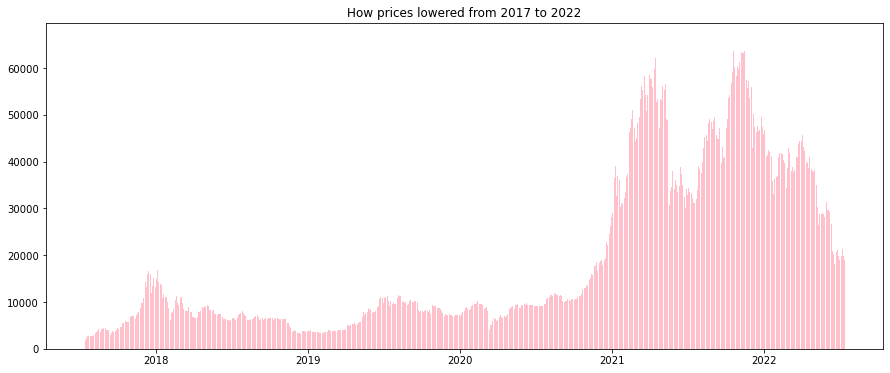

In [27]:
plt.figure(figsize=(15,6))
plt.bar(df.index, df['Low'], color = 'pink')
plt.title("How prices lowered from 2017 to 2022")

plt.show()
